#  Unsupervised learning

Unsupervised learning is a class of machine learning techniques for discovering patterns in data. For instance, finding the natural "clusters" of customers based on their purchase histories, or searching for patterns and correlations among these purchases, and using these patterns to express the data in a compressed form. These are examples of unsupervised learning techniques called "clustering" and "dimension reduction".
3. Supervised vs unsupervised learning

Unsupervised learning is defined in opposition to supervised learning. An example of supervised learning is using the measurements of tumors to classify them as benign or cancerous. In this case, the pattern discovery is guided, or "supervised", so that the patterns are as useful as possible for predicting the label: benign or cancerous. Unsupervised learning, in contrast, is learning without labels. It is pure pattern discovery, unguided by a prediction task. You'll start by learning about clustering. But before we begin, let's introduce a dataset and fix some terminology.
4. Iris dataset

The iris dataset consists of the measurements of many iris plants of three different species. There are four measurements: petal length, petal width, sepal length and sepal width. These are the features of the dataset.

    1 http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html/

5. Arrays, features & samples

Throughout this course, datasets like this will be written as two-dimensional numpy arrays. The columns of the array will correspond to the features. The measurements for individual plants are the samples of the dataset. These correspond to rows of the array.
6. Iris data is 4-dimensional

The samples of the iris dataset have four measurements, and so correspond to points in a four-dimensional space. This is the dimension of the dataset. We can't visualize four dimensions directly, but using unsupervised learning techniques we can still gain insight.
7. k-means clustering

In this chapter, we'll cluster these samples using k-means clustering. k-means finds a specified number of clusters in the samples. It's implemented in the scikit-learn or "sklearn" library. Let's see kmeans in action on some samples from the iris dataset.
8. k-means clustering with scikit-learn

The iris samples are represented as an array. To start, import kmeans from scikit-learn. Then create a kmeans model, specifying the number of clusters you want to find. Let's specify 3 clusters, since there are three species of iris. Now call the fit method of the model, passing the array of samples. This fits the model to the data, by locating and remembering the regions where the different clusters occur. Then we can use the predict method of the model on these same samples. This returns a cluster label for each sample, indicating to which cluster a sample belongs. Let's assign the result to labels, and print it out.
9. Cluster labels for new samples

If someone comes along with some new iris samples, k-means can determine to which clusters they belong without starting over. k-means does this by remembering the mean (or average) of the samples in each cluster. These are called the "centroids". New samples are assigned to the cluster whose centroid is closest.
10. Cluster labels for new samples

Suppose you've got an array of new samples. To assign the new samples to the existing clusters, pass the array of new samples to the predict method of the kmeans model. This returns the cluster labels of the new samples.
11. Scatter plots

In the next video, you'll learn how to evaluate the quality of your clustering. But for now, let's visualize our clustering of the iris samples using scatter plots. Here is a scatter plot of the sepal length vs petal length of the iris samples. Each point represents an iris sample, and is colored according to the cluster of the sample. To create a scatter plot like this, use PyPlot.
12. Scatter plots

Firstly, import PyPlot. It is conventionally imported as plt. Now get the x- and y- co-ordinates of each sample. Sepal length is in the 0th column of the array, while petal length is in the 2nd column. Now call the plt dot scatter function, passing the x- and y- co-ordinates and specifying c=labels to color by cluster label. When you are ready to show your plot, call plt dot show. 

# How many clusters?

You are given an array points of size 300x2, where each row gives the (x, y) co-ordinates of a point on a map. Make a scatter plot of these points, and use the scatter plot to guess how many clusters there are.

matplotlib.pyplot has already been imported as plt. In the IPython Shell:

    Create an array called xs that contains the values of points[:,0] - that is, column 0 of points.
    Create an array called ys that contains the values of points[:,1] - that is, column 1 of points.
    Make a scatter plot by passing xs and ys to the plt.scatter() function.
    Call the plt.show() function to show your plot.

How many clusters do you see?
http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html/

In [7]:
>>> from sklearn.datasets import load_iris
>>> data = load_iris()
>>> data.target[[10, 25, 50]]
>>> list(data.target_names)

['setosa', 'versicolor', 'virginica']

In [8]:
data.data.shape

(150, 4)

In [9]:

# import some data to play with
iris =load_iris()
points = iris.data  # we only take the first two features.
y = iris.target

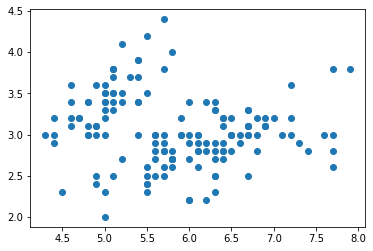

In [10]:
from matplotlib import pyplot as plt

xs= points[:,0]
ys = points[:,1]
plt.scatter(xs, ys)
plt.show()

The scatter plot suggests that there are 3 distinct clusters.

# Clustering 2D points

From the scatter plot of the previous exercise, you saw that the points seem to separate into 3 clusters. You'll now create a KMeans model to find 3 clusters, and fit it to the data points from the previous exercise. After the model has been fit, you'll obtain the cluster labels for some new points using the .predict() method.

You are given the array points from the previous exercise, and also an array new_points

In [11]:
"""Import KMeans from sklearn.cluster.
Using KMeans(), create a KMeans instance called model to find 3 clusters. To specify the number of clusters, use the n_clusters keyword argument.
Use the .fit() method of model to fit the model to the array of points points.
Use the .predict() method of model to predict the cluster labels of new_points, assigning the result to labels."""
# Import KMeans
from sklearn.cluster import KMeans
# Create a KMeans instance with 3 clusters: model
model =KMeans(n_clusters = 3)
# Fit model to points
model.fit(points)

# Determine the cluster labels of new_points: labels
labels = model.predict(points)

# Print cluster labels of new_points
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


You've successfully performed k-Means clustering and predicted the labels of new points. But it is not easy to inspect the clustering by just looking at the printed labels. A visualization would be far more useful.

# Inspect your clustering

Let's now inspect the clustering you performed in the previous exercise!

A solution to the previous exercise has already run, so new_points is an array of points and labels is the array of their cluster labels.

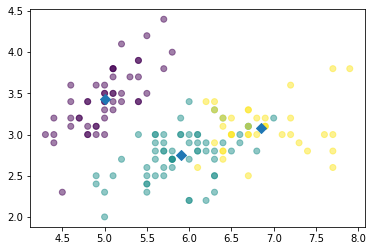

In [12]:
"""Import matplotlib.pyplot as plt.
Assign column 0 of new_points to xs, and column 1 of new_points to ys.
Make a scatter plot of xs and ys, specifying the c=labels keyword arguments to color the points by their cluster label. Also specify alpha=0.5.
Compute the coordinates of the centroids using the .cluster_centers_ attribute of model.
Assign column 0 of centroids to centroids_x, and column 1 of centroids to centroids_y.
Make a scatter plot of centroids_x and centroids_y, using 'D' (a diamond) as a marker by specifying the marker parameter. Set the size of the markers to be 50 using s=50"""
# Import pyplot
from matplotlib import pyplot as plt

# Assign the columns of new_points: xs and ys
xs = points[:,0]
ys = points[:,1]

# Make a scatter plot of xs and ys, using labels to define the colors
plt.scatter(xs, ys, c=labels, alpha=0.5)

# Assign the cluster centers: centroids
centroids = model.cluster_centers_

# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

# Make a scatter plot of centroids_x and centroids_y
plt.scatter(centroids_x, centroids_y, marker='D', s=50)
plt.show()


 The clustering looks great! But how can you be sure that 3 clusters is the correct choice? In other words, how can you evaluate the quality of a clustering?
 # Evaluating a clustering

In the previous video, we used k-means to cluster the iris samples into three clusters. But how can we evaluate the quality of this clustering?
2. Evaluating a clustering

A direct approach is to compare the clusters with the iris species. You'll learn about this first, before considering the problem of how to measure the quality of a clustering in a way that doesn't require our samples to come pre-grouped into species. This measure of quality can then be used to make an informed choice about the number of clusters to look for.
3. Iris: clusters vs species

Firstly, let's check whether the 3 clusters of iris samples have any correspondence to the iris species. The correspondence is described by this table. There is one column for each of the three species of iris: setosa, versicolor and virginica, and one row for each of the three cluster labels: 0, 1 and 2. The table shows the number of samples that have each possible cluster label/species combination. For example, we see that cluster 1 corresponds perfectly with the species setosa. On the other hand, while cluster 0 contains mainly virginica samples, there are also some virginica samples in cluster 2.
4. Cross tabulation with pandas

Tables like these are called "cross-tabulations". To construct one, we are going to use the pandas library. Let's assume the species of each sample is given as a list of strings.
5. Aligning labels and species

Import pandas, and then create a two-column DataFrame, where the first column is cluster labels and the second column is the iris species, so that each row gives the cluster label and species of a single sample.
6. Crosstab of labels and species

Now use the pandas crosstab function to build the cross tabulation, passing the two columns of the DataFrame. Cross tabulations like these provide great insights into which sort of samples are in which cluster. But in most datasets, the samples are not labelled by species. How can the quality of a clustering be evaluated in these cases?
7. Measuring clustering quality

We need a way to measure the quality of a clustering that uses only the clusters and the samples themselves. A good clustering has tight clusters, meaning that the samples in each cluster are bunched together, not spread out.
8. Inertia measures clustering quality

How spread out the samples within each cluster are can be measured by the "inertia". Intuitively, inertia measures how far samples are from their centroids. You can find the precise definition in the scikit-learn documentation. We want clusters that are not spread out, so lower values of the inertia are better. The inertia of a kmeans model is measured automatically when any of the fit methods are called, and is available afterwards as the inertia attribute. In fact, kmeans aims to place the clusters in a way that minimizes the inertia.
9. The number of clusters

Here is a plot of the inertia values of clusterings of the iris dataset with different numbers of clusters. Our kmeans model with 3 clusters has relatively low inertia, which is great. But notice that the inertia continues to decrease slowly. So what's the best number of clusters to choose?
10. How many clusters to choose?

Ultimately, this is a trade-off. A good clustering has tight clusters (meaning low inertia). But it also doesn't have too many clusters. A good rule of thumb is to choose an elbow in the inertia plot, that is, a point where the inertia begins to decrease more slowly. For example, by this criterion, 3 is a good number of clusters for the iris dataset.
11. Let's practice!

In this video, you've learned ways to evaluate the quality of a clustering. In the next video, you'll learn to use feature scaling to make your clusterings even better. For now, let's practice! 

In [13]:
import pandas as pd
print(pd.__file__)

/home/abderrazak/Téléchargements/yes/envs/stuff/lib/python3.7/site-packages/pandas/__init__.py


In [14]:
import pandas as pd
grain= pd.read_csv('/home/abderrazak/ALLINHERE/NLP/Datacamp/Grains/Aseeds.csv', header=None)
grain.tail()

,0,1,2,3,4,5,6,7
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3
209,12.30,13.34,0.8684,5.243,2.974,5.637,5.063,3


# How many clusters of grain?

In the video, you learned how to choose a good number of clusters for a dataset using the k-means inertia graph. You are given an array samples containing the measurements (such as area, perimeter, length, and several others) of samples of grain. What's a good number of clusters in this case?

KMeans and PyPlot (plt) have already been imported for you.

In [15]:
samples= grain.iloc[:,0:-1]
varieties= grain.iloc[:,-1]

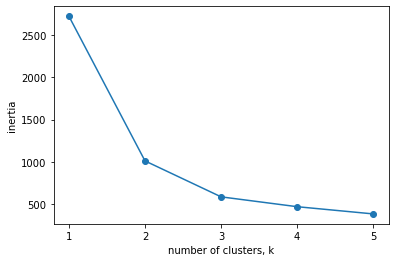

In [16]:
"""
    For each of the given values of k, perform the following steps:
    Create a KMeans instance called model with k clusters.
    Fit the model to the grain data samples.
    Append the value of the inertia_ attribute of model to the list inertias.
    The code to plot ks vs inertias has been written for you, so hit 'Submit Answer' to see the plot!
"""
ks = range(1, 6)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model= KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(samples)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()


The inertia decreases very slowly from 3 clusters to 4, so it looks like 3 clusters would be a good choice for this data.

# Evaluating the grain clustering

In the previous exercise, you observed from the inertia plot that 3 is a good number of clusters for the grain data. In fact, the grain samples come from a mix of 3 different grain varieties: "Kama", "Rosa" and "Canadian". In this exercise, cluster the grain samples into three clusters, and compare the clusters to the grain varieties using a cross-tabulation.

You have the array samples of grain samples, and a list varieties giving the grain variety for each sample. Pandas (pd) and KMeans have already been imported for you.

In [17]:
# Create a KMeans model with 3 clusters: model
model = KMeans(n_clusters=3)

# Use fit_predict to fit model and obtain cluster labels: labels
labels = model.fit_predict(samples)

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': varieties})

# Create crosstab: ct
ct =pd.crosstab(df['labels'],df['varieties'])

# Display ct
print(ct)


varieties   1   2   3
labels               
0           9   0  68
1           1  60   0
2          60  10   2


The cross-tabulation shows that the 3 varieties of grain separate really well into 3 clusters. But depending on the type of data you are working with, the clustering may not always be this good. Is there anything you can do in such situations to improve your clustering? You'll find out in the next video!
# Transforming features for better clusterings


In [71]:
colnames=['target', 'a', 'b', 'c', 'd', 'e',
       'f']
df= pd.read_csv('/home/abderrazak/ALLINHERE/NLP/Datacamp/fish.csv',names=colnames)
df.head()

,target,a,b,c,d,e,f
0,Bream,242.0,23.2,25.4,30.0,38.4,13.4
1,Bream,290.0,24.0,26.3,31.2,40.0,13.8
2,Bream,340.0,23.9,26.5,31.1,39.8,15.1
3,Bream,363.0,26.3,29.0,33.5,38.0,13.3
4,Bream,430.0,26.5,29.0,34.0,36.6,15.1


In [72]:
df.target.value_counts()

Bream    34
Roach    20
Pike     17
Smelt    14
Name: target, dtype: int64

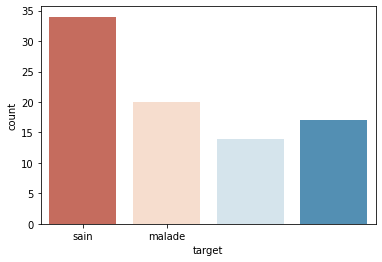

In [73]:
import seaborn as sns 
plt.figure()
sns.countplot(x='target', data=df, palette='RdBu')
plt.xticks([0,1], ['sain', 'malade'])
plt.show()

In [74]:
import numpy as np 
def reduce_mem_usage(df):
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

    for col in df.columns:
        col_type = df[col].dtype
    if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.uint8).min and c_max < np.iinfo(np.uint8).max:
                    df[col] = df[col].astype(np.uint8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.uint16).min and c_max < np.iinfo(np.uint16).max:
                    df[col] = df[col].astype(np.uint16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.uint32).min and c_max < np.iinfo(np.uint32).max:
                    df[col] = df[col].astype(np.uint32)                    
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
                elif c_min > np.iinfo(np.uint64).min and c_max < np.iinfo(np.uint64).max:
                    df[col] = df[col].astype(np.uint64)
            elif str(col_type)[:5] == 'float':
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    return df

In [75]:
df=reduce_mem_usage(df)

Memory usage of dataframe is 0.00 MB
Memory usage after optimization is: 0.00 MB
Decreased by 10.4%


In [76]:
df.describe()

,a,b,c,d,e,f
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,431.758824,27.338824,29.557647,33.120000,28.076471,12.867188
std,380.933962,11.289450,12.185045,13.197292,10.351543,2.117188
min,0.000000,9.300000,9.800000,10.800000,14.500000,8.703125
25%,120.000000,19.400000,21.000000,23.700000,16.900000,11.000000
50%,390.000000,28.400000,30.700000,35.000000,27.100000,13.703125
75%,650.000000,32.700000,36.000000,40.600000,39.200000,14.703125
max,1650.000000,59.000000,63.400000,68.000000,44.500000,16.093750


<AxesSubplot:>

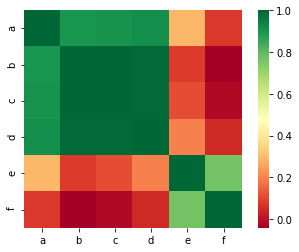

In [77]:
sns.heatmap(df.corr(), square=True, cmap='RdYlGn')

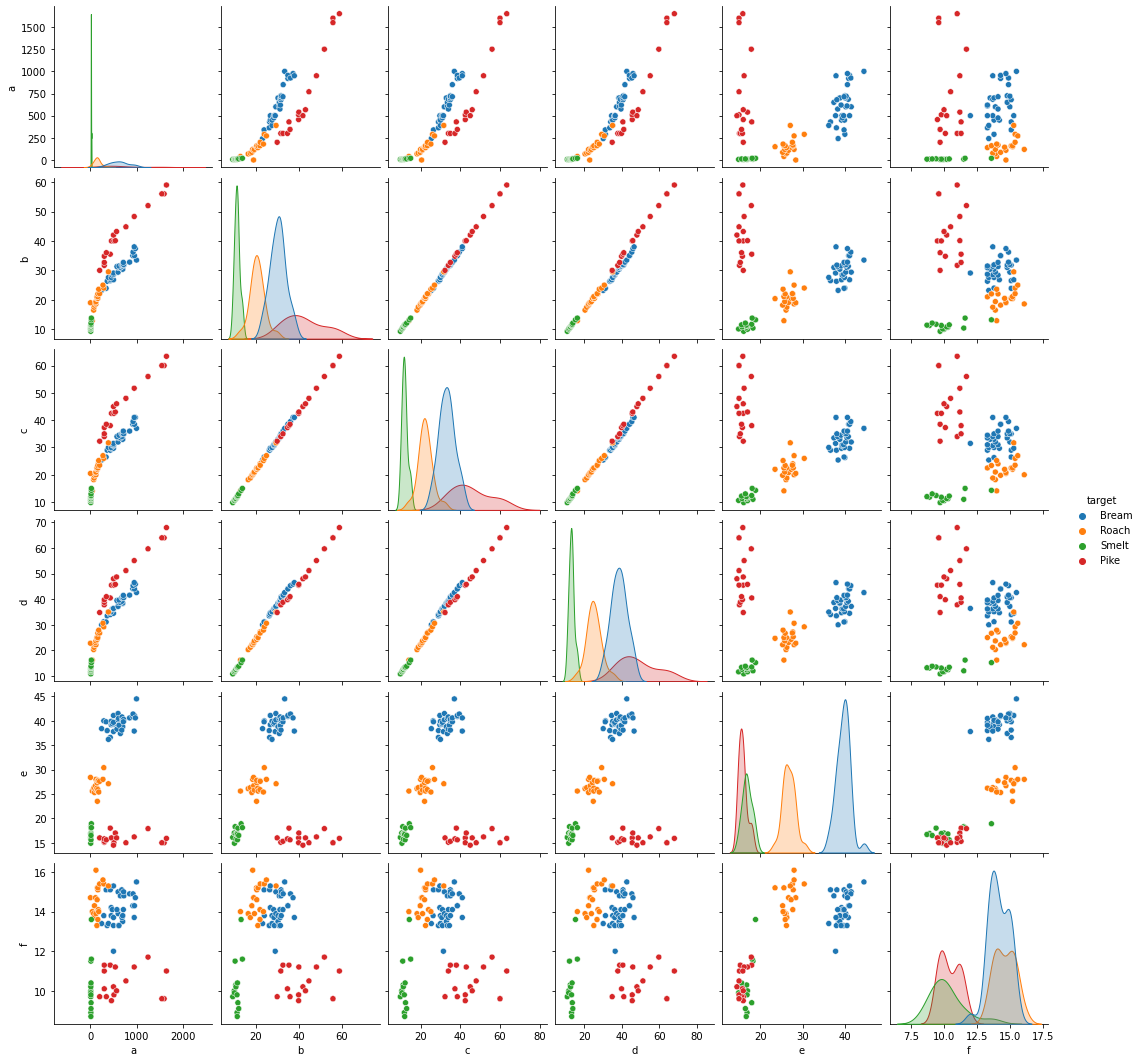

In [78]:
import seaborn as sns 
import pandas  as pd 
import glob
import pandas as pd 
import os 
import pylint
from unidecode import unidecode
import numpy as np 
from tqdm import trange, tqdm
import gc 
import warnings
warnings.filterwarnings("ignore")

sns.pairplot(df, hue="target")

In [79]:
skewValue = df.skew()

print("Skew:")

print(skewValue)

Skew:
a    1.111577
b    0.500102
c    0.431596
d    0.171714
e    0.030527
f   -0.505371
dtype: float64


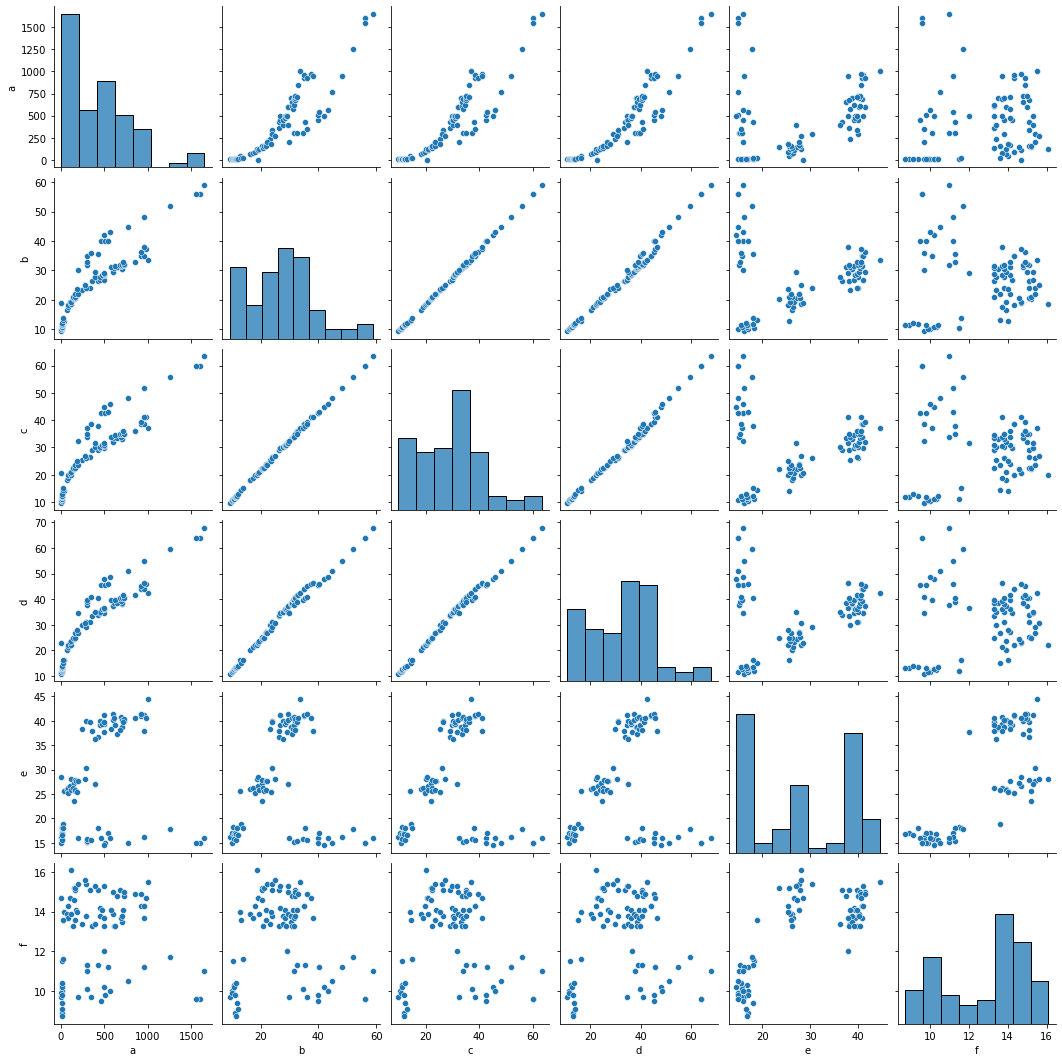

In [80]:
sns.pairplot(df)

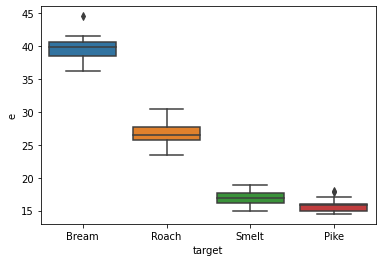

In [81]:
ax = sns.boxplot(x="target", y="e", data=df)

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   target  85 non-null     object 
 1   a       85 non-null     float64
 2   b       85 non-null     float64
 3   c       85 non-null     float64
 4   d       85 non-null     float64
 5   e       85 non-null     float64
 6   f       85 non-null     float16
dtypes: float16(1), float64(5), object(1)
memory usage: 4.3+ KB


In [83]:
df.var()

a    145110.683403
b       127.451689
c       148.475328
d       174.168524
e       107.154440
f         4.480469
dtype: float64

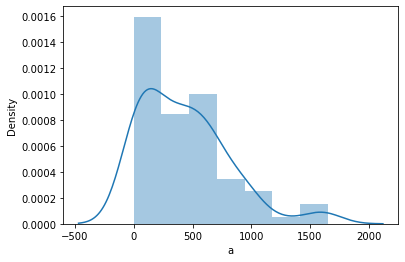

In [84]:
ax = sns.distplot(df["a"])

In [85]:
import numpy as np 
# Print out the variance of the Proline column
print(df['a'].var())

# Apply the log normalization function to the Proline column
df['a_log'] = np.log(df.a+431)

# Check the variance of the normalized Proline column
print(df['a_log'].var())

145110.68340336136
0.17740000109857426


In [86]:
df.var()

a        145110.683403
b           127.451689
c           148.475328
d           174.168524
e           107.154440
f             4.480469
a_log         0.177400
dtype: float64

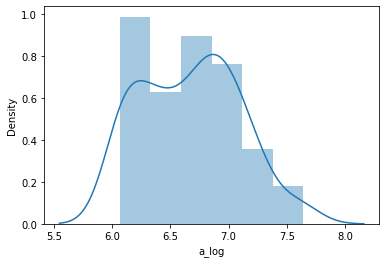

In [87]:
ax = sns.distplot(df['a_log'])

In [88]:
skewValue = df.a_log.skew()
skewValue

0.2040544012401545

# Scaling fish data for clustering

You are given an array samples giving measurements of fish. Each row represents an individual fish. The measurements, such as weight in grams, length in centimeters, and the percentage ratio of height to length, have very different scales. In order to cluster this data effectively, you'll need to standardize these features first. In this exercise, you'll build a pipeline to standardize and cluster the data.

In [36]:
"""
    Import:
        make_pipeline from sklearn.pipeline.
        StandardScaler from sklearn.preprocessing.
        KMeans from sklearn.cluster.
    Create an instance of StandardScaler called scaler.
    Create an instance of KMeans with 4 clusters called kmeans.
    Create a pipeline called pipeline that chains scaler and kmeans. To do this, you just need to pass them in as arguments to make_pipeline().
"""
# Perform the necessary imports
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Create scaler: scaler
scaler = StandardScaler()

# Create KMeans instance: kmeans
kmeans = KMeans(n_clusters=4)

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, kmeans)


Now that you've built the pipeline, you'll use it in the next exercise to cluster the fish by their 
# Clustering the fish data

You'll now use your standardization and clustering pipeline from the previous exercise to cluster the fish by their measurements, and then create a cross-tabulation to compare the cluster labels with the fish species.

As before, samples is the 2D array of fish measurements. Your pipeline is available as pipeline, and the species of every fish sample is given by the list species

In [37]:
samples= df.drop(['target', 'a'], axis=1).to_numpy()
species= df['target']

In [38]:
"""
    Import pandas as pd.
    Fit the pipeline to the fish measurements samples.
    Obtain the cluster labels for samples by using the .predict() method of pipeline.
    Using pd.DataFrame(), create a DataFrame df with two columns named 'labels' and 'species', using labels and species, respectively, for the column values.
    Using pd.crosstab(), create a cross-tabulation ct of df['labels'] and df['species'].
"""
# Import pandas
import pandas as pd

# Fit the pipeline to samples
pipeline.fit(samples)

# Calculate the cluster labels: labels
labels = pipeline.predict(samples)

# Create a DataFrame with labels and species as columns: df
df = pd.DataFrame({'labels': labels, 'species': species})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['species'])

# Display ct
print(ct)


species  Bream  Pike  Roach  Smelt
labels                            
0            1     0     19      1
1           33     0      1      0
2            0    17      0      0
3            0     0      0     13


# It looks like the fish data separates really well into 4 clusters!

In [39]:
df= pd.read_csv('/home/abderrazak/ALLINHERE/NLP/Datacamp/company-stock-movements-2010-2015-incl.csv')#names=colnames)
df.head()

,Unnamed: 0,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,...,2013-10-16,2013-10-17,2013-10-18,2013-10-21,2013-10-22,2013-10-23,2013-10-24,2013-10-25,2013-10-28,2013-10-29
0,Apple,0.580000,-0.220005,-3.409998,-1.170000,1.680011,-2.689994,-1.469994,2.779997,-0.680003,...,0.320008,4.519997,2.899987,9.590019,-6.540016,5.959976,6.910011,-5.359962,0.840019,-19.589981
1,AIG,-0.640002,-0.650000,-0.210001,-0.420000,0.710001,-0.200001,-1.130001,0.069999,-0.119999,...,0.919998,0.709999,0.119999,-0.480000,0.010002,-0.279998,-0.190003,-0.040001,-0.400002,0.660000
2,Amazon,-2.350006,1.260009,-2.350006,-2.009995,2.960006,-2.309997,-1.640007,1.209999,-1.790001,...,2.109985,3.699982,9.570008,-3.450013,4.820008,-4.079986,2.579986,4.790009,-1.760009,3.740021
3,American express,0.109997,0.000000,0.260002,0.720002,0.190003,-0.270001,0.750000,0.300004,0.639999,...,0.680001,2.290001,0.409996,-0.069999,0.100006,0.069999,0.130005,1.849999,0.040001,0.540001
4,Boeing,0.459999,1.770000,1.549999,2.690003,0.059997,-1.080002,0.360000,0.549999,0.530002,...,1.559997,2.480003,0.019997,-1.220001,0.480003,3.020004,-0.029999,1.940002,1.130005,0.309998


# Clustering stocks using KMeans

In this exercise, you'll cluster companies using their daily stock price movements (i.e. the dollar difference between the closing and opening prices for each trading day). You are given a NumPy array movements of daily price movements from 2010 to 2015 (obtained from Yahoo! Finance), where each row corresponds to a company, and each column corresponds to a trading day.

Some stocks are more expensive than others. To account for this, include a Normalizer at the beginning of your pipeline. The Normalizer will separately transform each company's stock price to a relative scale before the clustering begins.

Note that Normalizer() is different to StandardScaler(), which you used in the previous exercise. While StandardScaler() standardizes features (such as the features of the fish data from the previous exercise) by removing the mean and scaling to unit variance, Normalizer() rescales each sample - here, each company's stock price - independently of the other.

KMeans and make_pipeline have already been imported for you.

In [40]:
movements=df.drop('Unnamed: 0', axis=1).to_numpy()

In [41]:
"""Import Normalizer from sklearn.preprocessing.
Create an instance of Normalizer called normalizer.
Create an instance of KMeans called kmeans with 10 clusters.
Using make_pipeline(), create a pipeline called pipeline that chains normalizer and kmeans.
Fit the pipeline to the movements array."""
# Import Normalizer
from sklearn.preprocessing import Normalizer

# Create a normalizer: normalizer
normalizer = Normalizer()

# Create a KMeans model with 10 clusters: kmeans
kmeans = KMeans(n_clusters=10)

# Make a pipeline chaining normalizer and kmeans: pipeline
pipeline = make_pipeline(normalizer, kmeans)

# Fit pipeline to the daily price movements
pipeline.fit(movements)


Pipeline(steps=[('normalizer', Normalizer()),
                ('kmeans', KMeans(n_clusters=10))])

you're really getting the hang of this. Now that your pipeline has been set up, you can find out which stocks move together in the next exercise!

# Which stocks move together?

In the previous exercise, you clustered companies by their daily stock price movements. So which company have stock prices that tend to change in the same way? You'll now inspect the cluster labels from your clustering to find out.

Your solution to the previous exercise has already been run. Recall that you constructed a Pipeline pipeline containing a KMeans model and fit it to the NumPy array movements of daily stock movements. In addition, a list companies of the company names is available.

In [42]:
companies =  df['Unnamed: 0']

In [43]:
"""Import pandas as pd.
Use the .predict() method of the pipeline to predict the labels for movements.
Align the cluster labels with the list of company names companies by creating a DataFrame df with labels and companies as columns. This has been done for you.
Use the .sort_values() method of df to sort the DataFrame by the 'labels' column, and print the result."""
# Import pandas
import pandas as pd

# Predict the cluster labels: labels
labels = pipeline.predict(movements)

# Create a DataFrame aligning labels and companies: df
df = pd.DataFrame({'labels': labels, 'companies': companies})

# Display df sorted by cluster label
print(df.sort_values('labels'))


    labels                           companies
34       0                          Mitsubishi
58       0                               Xerox
21       0                               Honda
7        0                               Canon
48       0                              Toyota
45       0                                Sony
15       0                                Ford
16       1                   General Electrics
37       1                            Novartis
23       1                                 IBM
42       1                   Royal Dutch Shell
43       1                                 SAP
19       1                     GlaxoSmithKline
44       1                        Schlumberger
32       1                                  3M
13       1                   DuPont de Nemours
57       1                               Exxon
53       1                       Valero Energy
46       1                      Sanofi-Aventis
49       1                               Total
6        1   

Fantastic job - you have completed Chapter 1! Take a look at the clusters. Are you surprised by any of the results? In the next chapter, you'll learn about how to communicate results such as this through visualizations.

# Visualizing hierarchies

1. Visualizing hierarchies

A huge part of your work as a data scientist will be the communication of your insights to other people.
2. Visualizations communicate insight

Visualizations are an excellent way to share your findings, particularly with a non-technical audience. In this chapter, you'll learn about two unsupervised learning techniques for visualization: t-SNE and hierarchical clustering. t-SNE, which we'll consider later, creates a 2d map of any dataset, and conveys useful information about the proximity of the samples to one another. First up, however, let's learn about hierarchical clustering.
3. A hierarchy of groups

You've already seen many hierarchical clusterings in the real world. For example, living things can be organized into small narrow groups, like humans, apes, snakes and lizards, or into larger, broader groups like mammals and reptiles, or even broader groups like animals and plants. These groups are contained in one another, and form a hierarchy. Analogously, hierarchical clustering arranges samples into a hierarchy of clusters.
4. Eurovision scoring dataset

Hierarchical clustering can organize any sort of data into a hierarchy, not just samples of plants and animals. Let's consider a new type of dataset, describing how countries scored performances at the Eurovision 2016 song contest. The data is arranged in a rectangular array, where the rows of the array show how many points a country gave to each song. The "samples" in this case are the countries.

    1 http://www.eurovision.tv/page/results

5. Hierarchical clustering of voting countries

The result of applying hierarchical clustering to the Eurovision scores can be visualized as a tree-like diagram called a "dendrogram". This single picture reveals a great deal of information about the voting behavior of countries at the Eurovision. The dendrogram groups the countries into larger and larger clusters, and many of these clusters are immediately recognizable as containing countries that are close to one another geographically, or that have close cultural or political ties, or that belong to single language group. So hierarchical clustering can produce great visualizations. But how does it work?
6. Hierarchical clustering

Hierarchical clustering proceeds in steps. In the beginning, every country is its own cluster - so there are as many clusters as there are countries! At each step, the two closest clusters are merged. This decreases the number of clusters, and eventually, there is only one cluster left, and it contains all the countries. This process is actually a particular type of hierarchical clustering called "agglomerative clustering" - there is also "divisive clustering", which works the other way around. We haven't defined yet what it means for two clusters to be close, but we'll revisit that later on.
7. The dendrogram of a hierarchical clustering

The entire process of the hierarchical clustering is encoded in the dendrogram. At the bottom, each country is in a cluster of its own. The clustering then proceeds from the bottom up. Clusters are represented as vertical lines, and a joining of vertical lines indicates a merging of clusters. To understand better, let's zoom in
8. The dendrogram of a hierarchical clustering

and look at just one part of this dendrogram.
9. Dendrograms, step-by-step

In the beginning, there are six clusters, each containing only one country.
10. Dendrograms, step-by-step

The first merging is here, where the clusters containing Cyprus and Greece are merged together in a single cluster.
11. Dendrograms, step-by-step

Later on, this new cluster is merged with the cluster containing Bulgaria.
12. Dendrograms, step-by-step

Shortly after that, the clusters containing Moldova and Russia are merged,
13. Dendrograms, step-by-step

which later is in turn merged with the cluster containing Armenia.
14. Dendrograms, step-by-step

Later still, the two big composite clusters are merged together. This process continues
15. Dendrograms, step-by-step

until there is only one cluster left, and it contains all the countries.
16. Hierarchical clustering with SciPy

We'll use functions from scipy to perform a hierarchical clustering on the array of scores. For the dendrogram, we'll also need a list of country names. Firstly, import the linkage and dendrogram functions. Then, apply the linkage function to the sample array. Its the linkage function that performs the hierarchical clustering. Notice there is an extra method parameter - we'll cover that in the next video. Now pass the output of linkage to the dendrogram function, specifying the list of country names as the labels parameter. In the next video, you'll learn how to extract information from a hierarchical clustering, 

With 5 data samples, there would be 4 merge operations, and with 6 data samples, there would be 5 merges, and so on
# Hierarchical clustering of the grain data

In the video, you learned that the SciPy linkage() function performs hierarchical clustering on an array of samples. Use the linkage() function to obtain a hierarchical clustering of the grain samples, and use dendrogram() to visualize the result. A sample of the grain measurements is provided in the array samples, while the variety of each grain sample is given by the list varieties.

In [44]:
import pandas as pd
grain= pd.read_csv('/home/abderrazak/ALLINHERE/NLP/Datacamp/Grains/seeds.csv', header=None)
samples= grain.iloc[:,0:-1].to_numpy()
varieties= grain.iloc[:,-1].to_numpy()

FileNotFoundError: [Errno 2] No such file or directory: '/home/abderrazak/ALLINHERE/NLP/Datacamp/Grains/seeds.csv'

In [45]:
"""
    Import:
        linkage and dendrogram from scipy.cluster.hierarchy.
        matplotlib.pyplot as plt.
    Perform hierarchical clustering on samples using the linkage() function with the method='complete' keyword argument. Assign the result to mergings.
    Plot a dendrogram using the dendrogram() function on mergings. Specify the keyword arguments labels=varieties, leaf_rotation=90, and leaf_font_size=6.
"""
# Perform the necessary imports
from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 16), dpi=80, facecolor='w', edgecolor='k')
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Calculate the linkage: mergings
mergings =linkage(samples, method='complete') 

# Plot the dendrogram, using varieties as labels
dendrogram(mergings,
           labels=varieties,
           leaf_rotation=90,
           leaf_font_size=6,
)
plt.show()


ValueError: Dimensions of Z and labels must be consistent.

<Figure size 1600x1280 with 0 Axes>

Dendrograms are a great way to illustrate the arrangement of the clusters produced by hierarchical clustering.

# Hierarchies of stocks

In chapter 1, you used k-means clustering to cluster companies according to their stock price movements. Now, you'll perform hierarchical clustering of the companies. You are given a NumPy array of price movements movements, where the rows correspond to companies, and a list of the company names companies. SciPy hierarchical clustering doesn't fit into a sklearn pipeline, so you'll need to use the normalize() function from sklearn.preprocessing instead of Normalizer.

linkage and dendrogram have already been imported from scipy.cluster.hierarchy, and PyPlot has been imported as plt.

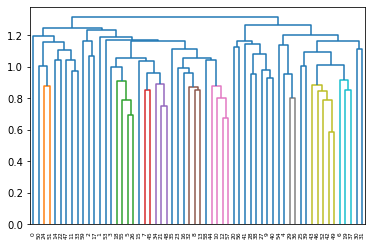

In [46]:
"""
    Import normalize from sklearn.preprocessing.
    Rescale the price movements for each stock by using the normalize() function on movements.
    Apply the linkage() function to normalized_movements, using 'complete' linkage, to calculate the hierarchical clustering. Assign the result to mergings.
    Plot a dendrogram of the hierarchical clustering, using the list companies of company names as the labels. In addition, specify the leaf_rotation=90, and leaf_font_size=6 keyword arguments as you did in the previous exercise.
"""
# Import normalize
from sklearn.preprocessing import normalize

# Normalize the movements: normalized_movements
normalized_movements = normalize(movements)

# Calculate the linkage: mergings
mergings = linkage(normalized_movements, method='complete')

# Plot the dendrogram
dendrogram(
    mergings,
)
plt.show()


you can produce great visualizations such as this with hierarchical clustering, but it can be used for more than just visualizations. You'll find out more about 

1. Cluster labels in hierarchical clustering

In the previous video, we employed hierarchical clustering

2. Cluster labels in hierarchical clustering

to create a great visualization of the voting behavior at the Eurovision. But hierarchical clustering is not only a visualization tool. In this video, you'll learn how to extract the clusters from intermediate stages of a hierarchical clustering. The cluster labels for these intermediate clusterings can then be used in further computations, such as cross tabulations, just like the cluster labels from k-means.

3. Intermediate clusterings & height on dendrogram

An intermediate stage in the hierarchical clustering is specified by choosing a height on the dendrogram. For example, choosing a height of 15 defines a clustering in which Bulgaria, Cyprus and Greece are in one cluster, Russia and Moldova are in another, and Armenia is in a cluster on its own. But what is the meaning of the height?

4. Dendrograms show cluster distances

The y-axis of the dendrogram encodes the distance between merging clusters. For example, the distance between the cluster containing Cyprus and the cluster containing Greece was approximately 6 when they were merged into a single cluster.

5. Dendrograms show cluster distances

When this new cluster was merged with the cluster containing Bulgaria, the distance between them was 12.

6. Intermediate clusterings & height on dendrogram

So the height that specifies an intermediate clustering corresponds to a distance. This specifies that the hierarchical clustering should stop merging clusters when all clusters are at least this far apart.

7. Distance between clusters

The distance between two clusters is measured using a "linkage method". In our example, we used "complete" linkage, where the distance between two clusters is the maximum of the distances between their samples. This was specified via the "method" parameter. There are many other linkage methods, and you'll see in the exercises that different linkage methods give different hierarchical clusterings!

8. Extracting cluster labels

The cluster labels for any intermediate stage of the hierarchical clustering can be extracted using the fcluster function. Let's try it out, specifying the height of 15.

9. Extracting cluster labels using fcluster

After performing the hierarchical clustering of the Eurovision data, import the fcluster function. Then pass the result of the linkage function to the fcluster function, specifying the height as the second argument. This returns a numpy array containing the cluster labels for all the countries.

10. Aligning cluster labels with country names

To inspect cluster labels, let's use a DataFrame to align the labels with the country names. Firstly, import pandas, then create the data frame, and then sort by cluster label, printing the result. As expected, the cluster labels group Bulgaria, Greece and Cyprus in the same cluster. But do note that the scipy cluster labels start at 1, not at 0 like they do in scikit-learn.
# Which clusters are closest?

In the video, you learned that the linkage method defines how the distance between clusters is measured. In complete linkage, the distance between clusters is the distance between the furthest points of the clusters. In single linkage, the distance between clusters is the distance between the closest points of the clusters.

# Different linkage, different hierarchical clustering!

In the video, you saw a hierarchical clustering of the voting countries at the Eurovision song contest using 'complete' linkage. Now, perform a hierarchical clustering of the voting countries with 'single' linkage, and compare the resulting dendrogram with the one in the video. Different linkage, different hierarchical clustering!

You are given an array samples. Each row corresponds to a voting country, and each column corresponds to a performance that was voted for. The list country_names gives the name of each voting country. 

In [47]:
import pandas as pd
grain= pd.read_csv('/home/abderrazak/ALLINHERE/NLP/Datacamp/eurovision.csv')
grain.head()

,From country,To country,Jury A,Jury B,Jury C,Jury D,Jury E,Jury Rank,Televote Rank,Jury Points,Televote Points
0,Albania,Belgium,20,16,24,22,24,25,14,NaN,NaN
1,Albania,Czech Republic,21,15,25,23,16,22,22,NaN,NaN
2,Albania,The Netherlands,22,14,23,24,21,24,24,NaN,NaN
3,Albania,Azerbaijan,19,12,11,21,11,13,19,NaN,NaN
4,Albania,Hungary,8,13,9,14,9,10,10,1.0,1.0


In [48]:
samples= grain.iloc[:,2:9].to_numpy()
country_names= grain.iloc[:,1].to_numpy()

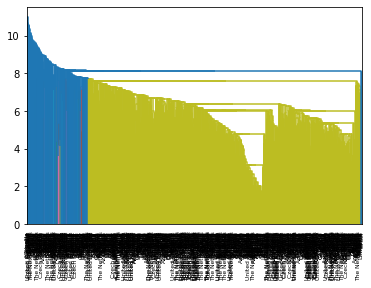

In [49]:
"""
    Import linkage and dendrogram from scipy.cluster.hierarchy.
    Perform hierarchical clustering on samples using the linkage() function with the method='single' keyword argument. Assign the result to mergings.
    Plot a dendrogram of the hierarchical clustering, using the list country_names as the labels. In addition, specify the leaf_rotation=90, and leaf_font_size=6 keyword arguments as you have done earlier.
"""
# Perform the necessary imports
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

# Calculate the linkage: mergings
mergings = linkage(samples, method='single')

# Plot the dendrogram
dendrogram(mergings,
           labels=country_names,
           leaf_rotation=90,
           leaf_font_size=6,
)
plt.show()


# Extracting the cluster labels

In the previous exercise, you saw that the intermediate clustering of the grain samples at height 6 has 3 clusters. Now, use the fcluster() function to extract the cluster labels for this intermediate clustering, and compare the labels with the grain varieties using a cross-tabulation.

The hierarchical clustering has already been performed and mergings is the result of the linkage() function. The list varieties gives the variety of each grain sample.

In [50]:
"""
    Import:
        pandas as pd.
        fcluster from scipy.cluster.hierarchy.
    Perform a flat hierarchical clustering by using the fcluster() function on mergings. Specify a maximum height of 6 and the keyword argument criterion='distance'.
    Create a DataFrame df with two columns named 'labels' and 'varieties', using labels and varieties, respectively, for the column values. This has been done for you.
    Create a cross-tabulation ct between df['labels'] and df['varieties'] to count the number of times each grain variety coincides with each cluster label.
"""
# Perform the necessary imports
import pandas as pd
from scipy.cluster.hierarchy import fcluster

# Use fcluster to extract labels: labels
labels = fcluster(mergings, 6, criterion='distance')

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': varieties})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['varieties'])

# Display ct
print(ct)


ValueError: array length 1066 does not match index length 210

#  t-SNE
1. t-SNE for 2-dimensional maps

In this video, you'll learn about an unsupervised learning method for visualization called "t-SNE".
2. t-SNE for 2-dimensional maps

t-SNE stands for "t-distributed stochastic neighbor embedding". It has a complicated name, but it serves a very simple purpose. It maps samples from their high-dimensional space into a 2- or 3-dimensional space so they can visualized. While some distortion is inevitable, t-SNE does a great job of approximately representing the distances between the samples. For this reason, t-SNE is an invaluable visual aid for understanding a dataset.
3. t-SNE on the iris dataset

To see what sorts of insights are possible with t-SNE, let's look at how it performs on the iris dataset. The iris samples are in a four dimensional space, where each dimension corresponds to one of the four iris measurements, such as petal length and petal width. Now t-SNE was given only the measurements of the iris samples. In particular it wasn't given any information about the three species of iris. But if we color the species differently on the scatter plot, we see that t-SNE has kept the species separate.
4. Interpreting t-SNE scatter plots

This scatter plot gives us a new insight, however. We learn that there are two iris species, versicolor and virginica, whose samples are close together in space. So it could happen that the iris dataset appears to have two clusters, instead of three. This is compatible with our previous examples using k-means, where we saw that a clustering with 2 clusters also had relatively low inertia, meaning tight clusters.
5. t-SNE in sklearn

t-SNE is available in scikit-learn, but it works a little differently to the fit/transform components you've already met. Let's see it in action on the iris dataset. The samples are in a 2-dimensional numpy array, and there is a list giving the species of each sample.
6. t-SNE in sklearn

To start with, import TSNE and create a TSNE object. Apply the fit_transform method to the samples, and then make a scatter plot of the result, coloring the points using the species. There are two aspects that deserve special attention: the fit_transform method, and the learning rate.
7. t-SNE has only fit_transform()

t-SNE only has a fit_transform method. As you might expect, the fit_transform method simultaneously fits the model and transforms the data. However, t-SNE does not have separate fit and transform methods. This means that you can't extend a t-SNE map to include new samples. Instead, you have to start over each time.
8. t-SNE learning rate

The second thing to notice is the learning rate. The learning rate makes the use of t-SNE more complicated than some other techniques. You may need to try different learning rates for different datasets. It is clear, however, when you've made a bad choice, because all the samples appear bunched together in the scatter plot. Normally it's enough to try a few values between 50 and 200.
9. Different every time

A final thing to be aware of is that the axes of a t-SNE plot do not have any interpretable meaning. In fact, they are different every time t-SNE is applied, even on the same data. For example, here are three t-SNE plots of the scaled Piedmont wine samples, generated using the same code. Note that while the orientation of the plot is different each time, the three wine varieties, represented here using colors, have the same position relative to one another. 
# t-SNE visualization of grain dataset

In the video, you saw t-SNE applied to the iris dataset. In this exercise, you'll apply t-SNE to the grain samples data and inspect the resulting t-SNE features using a scatter plot. You are given an array samples of grain samples and a list variety_numbers giving the variety number of each grain sample.

In [ ]:
>>> from sklearn.datasets import load_iris
>>> data = load_iris()
>>> data.target[[10, 25, 50]]
>>> list(data.target_names)

In [ ]:
# import some data to play with
iris =load_iris()
points = iris.data  # we only take the first two features.
y = iris.target

In [ ]:
"""
    Import TSNE from sklearn.manifold.
    Create a TSNE instance called model with learning_rate=200.
    Apply the .fit_transform() method of model to samples. Assign the result to tsne_features.
    Select the column 0 of tsne_features. Assign the result to xs.
    Select the column 1 of tsne_features. Assign the result to ys.
    Make a scatter plot of the t-SNE features xs and ys. To color the points by the grain variety, specify the additional keyword argument c=variety_numbers.
"""
# Import TSNE
from sklearn.manifold import TSNE

# Create a TSNE instance: model
model = TSNE(learning_rate=200)

# Apply fit_transform to samples: tsne_features
tsne_features = model.fit_transform(points)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1st feature: ys
ys = tsne_features[:,1]

# Scatter plot, coloring by variety_numbers
plt.scatter(xs, ys, c=y)
plt.show()


As you can see, the t-SNE visualization manages to separate the 3 varieties of grain samples. But how will it perform on the stock data? You'll find out in the next exercise!
# A t-SNE map of the stock market

t-SNE provides great visualizations when the individual samples can be labeled. In this exercise, you'll apply t-SNE to the company stock price data. A scatter plot of the resulting t-SNE features, labeled by the company names, gives you a map of the stock market! The stock price movements for each company are available as the array normalized_movements (these have already been normalized for you). The list companies gives the name of each company. PyPlot (plt) has been imported for you.

In [ ]:
df= pd.read_csv('/home/abderrazak/ALLINHERE/NLP/Datacamp/company-stock-movements-2010-2015-incl.csv')#names=colnames)
df.head()

In [ ]:
movements=df.drop('Unnamed: 0', axis=1).to_numpy()
companies =  df['Unnamed: 0']

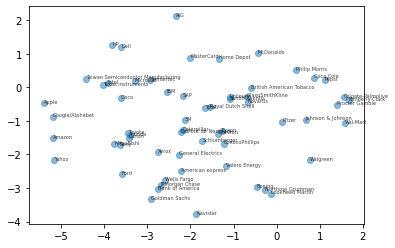

In [51]:
"""A t-SNE map of the stock market

t-SNE provides great visualizations when the individual samples can be labeled. 
In this exercise, you'll apply t-SNE to the company stock price data.
A scatter plot of the resulting t-SNE features, labeled by the company names, gives you a map of the stock market!
The stock price movements for each company are available as the array normalized_movements (these have already been normalized for you).
The list companies gives the name of each company. PyPlot (plt) has been imported for you."""

# Import TSNE
from sklearn.manifold import TSNE

# Create a TSNE instance: model
model = TSNE(learning_rate=50)

# Apply fit_transform to normalized_movements: tsne_features
tsne_features = model.fit_transform(normalized_movements)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1th feature: ys
ys = tsne_features[:,1]

# Scatter plot
plt.scatter(xs, ys, alpha=0.5)

# Annotate the points
for x, y, company in zip(xs, ys, companies):
    plt.annotate(company, (x, y), fontsize=5, alpha=0.75)
plt.show()


It's visualizations such as this that make t-SNE such a powerful tool for extracting quick insights from high dimensional data
# PCA transformation
1. Visualizing the PCA transformation

In the next two chapters you'll learn techniques for dimension reduction.
2. Dimension reduction

Dimension reduction finds patterns in data, and uses these patterns to re-express it in a compressed form. This makes subsequent computation with the data much more efficient, and this can be a big deal in a world of big datasets. However, the most important function of dimension reduction is to reduce a dataset to its "bare bones", discarding noisy features that cause big problems for supervised learning tasks like regression and classification. In many real-world applications, it's dimension reduction that makes prediction possible.
3. Principal Component Analysis

In this chapter, you'll learn about the most fundamental of dimension reduction techniques. It's called "Principal Component Analysis", or "PCA" for short. PCA performs dimension reduction in two steps, and the first one, called "de-correlation", doesn't change the dimension of the data at all. It's this first step that we'll focus on in this video.
4. PCA aligns data with axes

In this first step, PCA rotates the samples so that they are aligned with the coordinate axes. In fact, it does more than this: PCA also shifts the samples so that they have mean zero. These scatter plots show the effect of PCA applied to two features of the wine dataset. Notice that no information is lost - this is true no matter how many features your dataset has. You'll practice visualizing this transformation in the exercises.
5. PCA follows the fit/transform pattern

scikit-learn has an implementation of PCA, and it has fit and transform methods just like StandardScaler. The fit method learns how to shift and how to rotate the samples, but doesn't actually change them. The transform method, on the other hand, applies the transformation that fit learned. In particular, the transform method can be applied to new, unseen samples.
6. Using scikit-learn PCA

Let's see PCA in action on the some features of the wine dataset. Firstly, import PCA. Now create a PCA object, and fit it to the samples. Then use the fit PCA object to transform the samples. This returns a new array of transformed samples.
7. PCA features

This new array has the same number of rows and columns as the original sample array. In particular, there is one row for each transformed sample. The columns of the new array correspond to "PCA features", just as the original features corresponded to columns of the original array.
8. PCA features are not correlated

It is often the case that the features of a dataset are correlated. This is the case with many of the features of the wine dataset, for instance. However, PCA, due to the rotation it performs, "de-correlates" the data, in the sense that the columns of the transformed array are not linearly correlated.
9. Pearson correlation

Linear correlation can be measured with the Pearson correlation. It takes values between -1 and 1, where larger values indicate a stronger correlation, and 0 indicates no linear correlation. Here are some examples of features with varying degrees of correlation.
10. Principal components

Finally, PCA is called "principal component analysis" because it learns the "principal components" of the data. These are the directions in which the samples vary the most, depicted here in red. It is the principal components that PCA aligns with the coordinate axes.
11. Principal components

After a PCA model has been fit, the principal components are available as the components attribute. This is numpy array with one row for each principal component. 

# Correlated data in nature

You are given an array grains giving the width and length of samples of grain. You suspect that width and length will be correlated. To confirm this, make a scatter plot of width vs length and measure their Pearson correlation.

https://www.analyticssteps.com/blogs/introduction-principal-component-analysis-machine-learning

In [62]:
import pandas as pd
grain= pd.read_csv('/home/abderrazak/ALLINHERE/NLP/Datacamp/Grains/Aseeds.csv', header=None)
samples= grain.iloc[:,0:-1].to_numpy()
varieties= grain.iloc[:,-1].to_numpy()

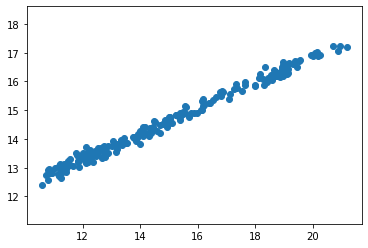

0.9943409310122264


In [63]:
"""
    Import:
        matplotlib.pyplot as plt.
        pearsonr from scipy.stats.
    Assign column 0 of grains to width and column 1 of grains to length.
    Make a scatter plot with width on the x-axis and length on the y-axis.
    Use the pearsonr() function to calculate the Pearson correlation of width and length.
"""
# Perform the necessary imports
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Assign the 0th column of grains: width
width = samples[:,0]

# Assign the 1st column of grains: length
length = samples[:,1]

# Scatter plot width vs length
plt.scatter(width, length)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation

correlation, pvalue = pearsonr(width, length)

# Display the correlation
print(correlation)

 As you would expect, the width and length of the grain samples are highly correlated.
 Decorrelating the grain measurements with PCA

You observed in the previous exercise that the width and length measurements of the grain are correlated. Now, you'll use PCA to decorrelate these measurements, then plot the decorrelated points and measure their Pearson correlation.

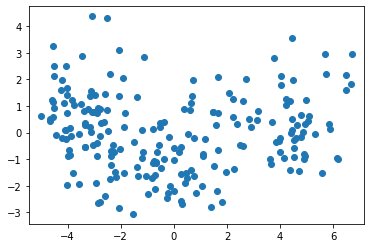

1.0408340855860843e-17


In [64]:
"""
    Import PCA from sklearn.decomposition.
    Create an instance of PCA called model.
    Use the .fit_transform() method of model to apply the PCA transformation to grains. Assign the result to pca_features.
    The subsequent code to extract, plot, and compute the Pearson correlation of the first two columns pca_features has been written for you, so hit 'Submit Answer' to see the result!
"""
# Import PCA
from sklearn.decomposition import PCA


# Create PCA instance: model
model = PCA()

# Apply the fit_transform method of model to grains: pca_features
pca_features = model.fit_transform(samples)

# Assign 0th column of pca_features: xs
xs = pca_features[:,0]

# Assign 1st column of pca_features: ys
ys = pca_features[:,1]

# Scatter plot xs vs ys
plt.scatter(xs, ys)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation of xs and ys
correlation, pvalue = pearsonr(xs, ys)

# Display the correlation
print(correlation)

# The first principal component

The first principal component of the data is the direction in which the data varies the most. In this exercise, your job is to use PCA to find the first principal component of the length and width measurements of the grain samples, and represent it as an arrow on the scatter plot.

The array grains gives the length and width of the grain samples. PyPlot (plt) and PCA have already been imported for you

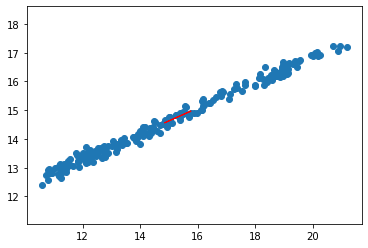

In [65]:
# Make a scatter plot of the untransformed points
plt.scatter(samples[:,0], samples[:,1])

# Create a PCA instance: model
model = PCA()

# Fit model to points
model.fit(samples)

# Get the mean of the grain samples: mean
mean = model.mean_

# Get the first principal component: first_pc
first_pc = model.components_[0,:]

# Plot first_pc as an arrow, starting at mean
plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color='red', width=0.01)

# Keep axes on same scale
plt.axis('equal')
plt.show()

In [67]:
print(model.n_components_)

7


In [68]:
print(model.components_)

[[ 0.8842285   0.39540542  0.00431132  0.12854448  0.11105914 -0.12761562
   0.1289665 ]
 [ 0.10080577  0.05648963 -0.00289474  0.03062173  0.00237229  0.98941048
   0.08223339]
 [ 0.26453354 -0.28251995  0.05903584 -0.40014946  0.31923869  0.06429754
  -0.76193973]
 [-0.19944949  0.57881686 -0.05776023  0.43610024 -0.23416358  0.02514736
  -0.61335659]
 [-0.13717297  0.57475603 -0.05310454 -0.78699776 -0.1448029  -0.00157564
   0.08765361]
 [ 0.28063956 -0.30155864 -0.04522905 -0.11343761 -0.89626785  0.003288
  -0.10992364]
 [ 0.02539824 -0.0658399  -0.99412565 -0.00143143  0.0815499  -0.00114269
  -0.00897193]]


In [69]:
print(model.explained_variance_)

[1.07933269e+01 2.12945512e+00 7.36300330e-02 1.28874947e-02
 2.74822668e-03 1.57044980e-03 2.96554425e-05]


1. Intrinsic dimension

2. Intrinsic dimension of a flight path

Consider this dataset with 2 features: latitude and longitude. These two features might track the flight of an airplane, for example. This dataset is 2-dimensional, yet it turns out that it can be closely approximated using only one feature: the displacement along the flight path. This dataset is intrinsically one-dimensional.
3. Intrinsic dimension

The intrinsic dimension of a dataset is the number of features required to approximate it. The intrinsic dimension informs dimension reduction, because it tells us how much a dataset can be compressed. In this video, you'll gain a solid understanding of the intrinsic dimension, and be able to use PCA to identify it in real-world datasets that have thousands of features.
4. Versicolor dataset

To better illustrate the intrinsic dimension, let's consider an example dataset containing only some of the samples from the iris dataset. Specifically, let's take three measurements from the iris versicolor samples: sepal length, sepal width, and petal width. So each sample is represented as a point in 3-dimensional space.
5. Versicolor dataset has intrinsic dimension 2

However, if we make a 3d scatter plot of the samples, we see that they all lie very close to a flat, 2-dimensional sheet. This means that the data can be approximated by using only two coordinates, without losing much information. So this dataset has intrinsic dimension 2.
6. PCA identifies intrinsic dimension

But scatter plots are only possible if there are 3 features or less. So how can the intrinsic dimension be identified, even if there are many features? This is where PCA is really helpful. The intrinsic dimension can be identified by counting the PCA features that have high variance. To see how, let's see what happens when PCA is applied to the dataset of versicolor samples.
7. PCA of the versicolor samples

PCA rotates and shifts the samples to align them with the coordinate axes. This expresses the samples using three PCA features.
8. PCA features are ordered by variance descending

The PCA features are in a special order. Here is a bar graph showing the variance of each of the PCA features. As you can see, each PCA feature has less variance than the last, and in this case the last PCA feature has very low variance. This agrees with the scatter plot of the PCA features, where the samples don't vary much in the vertical direction. In the other two directions, however, the variance is apparent.
9. Variance and intrinsic dimension

The intrinsic dimension is the number of PCA features that have significant variance. In our example, only the first two PCA features have significant variance. So this dataset has intrinsic dimension 2, which agrees with what we observed when inspecting the scatter plot.
10. Plotting the variances of PCA features

Let's see how to plot the variances of the PCA features in practice. Firstly, make the necessary imports. Then create a PCA model, and fit it to the samples. Now create a range enumerating the PCA features,
11. Plotting the variances of PCA features

and make a bar plot of the variances; the variances are available as the explained_variance attribute of the PCA model.
12. Intrinsic dimension can be ambiguous

The intrinsic dimension is a useful idea that helps to guide dimension reduction. However, it is not always unambiguous. Here is a graph of the variances of the PCA features for the wine dataset. We could argue for an intrinsic dimension of 2, of 3, or even more, depending upon the threshold you chose. 
# Variance of the PCA features

The fish dataset is 6-dimensional. But what is its intrinsic dimension? Make a plot of the variances of the PCA features to find out. As before, samples is a 2D array, where each row represents a fish. You'll need to standardize the features first.

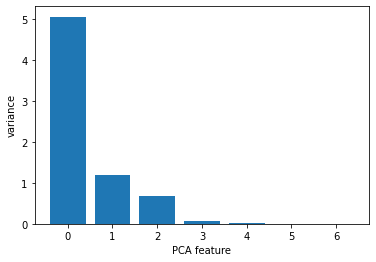

In [70]:
# Perform the necessary imports
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler,pca)

# Fit the pipeline to 'samples'
pipeline.fit(samples)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features,pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()


# Dimension reduction of the fish measurements

In a previous exercise, you saw that 2 was a reasonable choice for the "intrinsic dimension" of the fish measurements. Now use PCA for dimensionality reduction of the fish measurements, retaining only the 2 most important components.

The fish measurements have already been scaled for you, and are available as scaled_samples.

In [90]:

# Perform the necessary imports
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Create scaler: scaler
scaler = StandardScaler()



samples= df.drop(['target', 'a'], axis=1).to_numpy()
species= df['target']
samplesscaled= scaler.fit_transform(samples)

In [91]:
# Import PCA
from sklearn.decomposition import PCA

# Create a PCA model with 2 components: pca
pca = PCA(n_components=2)

# Fit the PCA instance to the scaled samples
pca.fit(samplesscaled)

# Transform the scaled samples: pca_features
pca_features = pca.transform(samplesscaled)

# Print the shape of pca_features
print(pca_features.shape)


(85, 2)


You've successfully reduced the dimensionality from 6 to 2.

In [110]:
import pandas as pd
from scipy.sparse import csr_matrix

df = pd.read_csv('/home/abderrazak/ALLINHERE/NLP/Datacamp//Wikipedia articles/wikipedia-vectors.csv', index_col=0)
articles = csr_matrix(df.transpose())
titles = list(df.columns)

In [111]:
df.head()

,HTTP 404,Alexa Internet,Internet Explorer,HTTP cookie,Google Search,Tumblr,Hypertext Transfer Protocol,Social search,Firefox,LinkedIn,...,Chad Kroeger,Nate Ruess,The Wanted,Stevie Nicks,Arctic Monkeys,Black Sabbath,Skrillex,Red Hot Chili Peppers,Sepsis,Adam Levine
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.008878,0.0,0.0,0.049502,0.000000,0.00000,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00611,0.0
2,0.0,0.029607,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00000,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.005646,0.00000,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00000,0.0


In [113]:
# Import TfidfVectorizer
from sklearn.feature_extraction.text import   TfidfVectorizer 

# Create a TfidfVectorizer: tfidf
tfidf =     TfidfVectorizer()
# Apply fit_transform to document: csr_mat
csr_mat = tfidf.fit_transform(titles)

# Print result of toarray() method
print(csr_mat.toarray())

# Get the words: words
words = tfidf.get_feature_names()

# Print words
print(words)


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
['2007', '2010', '2014', '350', '404', 'action', 'adam', 'alexa', 'angelina', 'aniston', 'anne', 'appropriate', 'arctic', 'arsenal', 'biel', 'black', 'by', 'catherine', 'chad', 'change', 'chili', 'climate', 'colombia', 'conference', 'connie', 'cookie', 'cristiano', 'crowe', 'cup', 'dakota', 'denzel', 'doxycycline', 'emissions', 'explorer', 'falcao', 'fanning', 'fassbender', 'fever', 'fifa', 'firefox', 'football', 'france', 'franck', 'gabapentin', 'gas', 'global', 'google', 'gout', 'greenhouse', 'hathaway', 'hedegaard', 'hepatitis', 'hot', 'http', 'hypertext', 'ibrahimović', 'internet', 'jennifer', 'jessica', 'jolie', 'jones', 'kroeger', 'kunis', 'kyoto', 'lawson', 'leukemia', 'levine', 'linkedin', 'lymphoma', 'michael', 'mila', 'mitigation', 'monkeys', 'nate', 'national', 'nationally', 'nations', 'neymar', 'nicks', 'nigel', 'org', '

# Clustering Wikipedia part I

You saw in the video that TruncatedSVD is able to perform PCA on sparse arrays in csr_matrix format, such as word-frequency arrays. Combine your knowledge of TruncatedSVD and k-means to cluster some popular pages from Wikipedia. In this exercise, build the pipeline. In the next exercise, you'll apply it to the word-frequency array of some Wikipedia articles.

Create a Pipeline object consisting of a TruncatedSVD followed by KMeans. (This time, we've precomputed the word-frequency matrix for you, so there's no need for a TfidfVectorizer).

In [106]:
"""
    Import:
        TruncatedSVD from sklearn.decomposition.
        KMeans from sklearn.cluster.
        make_pipeline from sklearn.pipeline.
    Create a TruncatedSVD instance called svd with n_components=50.
    Create a KMeans instance called kmeans with n_clusters=6.
    Create a pipeline called pipeline consisting of svd and kmeans.

"""
# Perform the necessary imports
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

# Create a TruncatedSVD instance: svd
svd = TruncatedSVD(n_components=50)

# Create a KMeans instance: kmeans
kmeans = KMeans(n_clusters=6)

# Create a pipeline: pipeline
pipeline = make_pipeline(svd, kmeans)

pipeline

Pipeline(steps=[('truncatedsvd', TruncatedSVD(n_components=50)),
                ('kmeans', KMeans(n_clusters=6))])

# Clustering Wikipedia part II

It is now time to put your pipeline from the previous exercise to work! You are given an array articles of tf-idf word-frequencies of some popular Wikipedia articles, and a list titles of their titles. Use your pipeline to cluster the Wikipedia articles.

A solution to the previous exercise has been pre-loaded for you, so a Pipeline pipeline chaining TruncatedSVD with KMeans is available.

In [116]:
# Import pandas
import pandas as pd 

# Fit the pipeline to articles
pipeline.fit(articles)

# Calculate the cluster labels: labels
labels = pipeline.predict(articles)

# Create a DataFrame aligning labels and titles: df
df = pd.DataFrame({'label': labels, 'article': titles})

# Display df sorted by cluster label
print(df.sort_values('label'))
# Import pandas
import pandas as pd 

# Fit the pipeline to articles
pipeline.fit(articles)

# Calculate the cluster labels: labels
labels = pipeline.predict(articles)

# Create a DataFrame aligning labels and titles: df
df = pd.DataFrame({'label': labels, 'article': titles})

# Display df sorted by cluster label
print()


    label                                        article
39      0                                  Franck Ribéry
37      0                                       Football
36      0              2014 FIFA World Cup qualification
35      0                Colombia national football team
34      0                             Zlatan Ibrahimović
33      0                                 Radamel Falcao
32      0                                   Arsenal F.C.
31      0                              Cristiano Ronaldo
30      0                  France national football team
38      0                                         Neymar
47      1                                          Fever
46      1                                     Prednisone
45      1                                    Hepatitis C
44      1                                           Gout
48      1                                     Gabapentin
42      1                                    Doxycycline
41      1                      

Take a look at the cluster labels and see if you can identify any patterns!

In [119]:
def build_tfidf_model(corpus):
    transformer = TfidfVectorizer(analyzer='word')
    matrix = transformer.fit_transform(corpus)
    return matrix

def svd_tfidf_matrix(matrix):
    svd = TruncatedSVD(n_components=3)
    svd.fit_transform(matrix)
    return svd.fit_transform(matrix)


corpus = ['sentence one', 'sentence two', 'another one', 'another sentence', 'two sentence', 'one sentence']
tfidf_model = build_tfidf_model(corpus)
reduced_vectors = svd_tfidf_matrix(matrix=tfidf_model)

In [120]:
print(tfidf_model.shape)
print(reduced_vectors.shape)

(6, 4)
(6, 3)
